# ~MegaMachine~

**Copyright@~MEGAMACHINE~**; 

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License. You may obtain a copy of the License at https://www.apache.org/licenses/LICENSE-2.0. Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

**Disclosure: Nothing in this lecture should be considered as investment or business advices. Past performance is not necessarily indicative of future returns. Predatory Pricing Dataset and Customers Dataset during these lectures is only taken as the general example to show, how one can do data analysis using pandas (in python). I AM NOT REPOSIBLE FOR YOUR ANY KIND OF LOSS/PROFIT IN/ON YOUR BUSINESS/STOCKS RETURNS. Consider a financial adviser before investing or invest at your own risk.**

In [1]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt


print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('pyplot: ',plt)

numpy version: 1.23.1
pandas version:  1.4.3
pyplot:  <module 'matplotlib.pyplot' from 'C:\\Users\\ankit.k\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>


# About Dataset – Predatory Pricing Dataset from Amazon

Description: Data on the unfair pricing and discounting practices by sellers on amazon during the COVID-19 crisis. Sellers on Amazon are using the Covid19 crisis to exploit the consumers. This data contains information on the product details, prices, discounts, reviews, listed date, and other key data points to understand the unfair practices.

Dataset source ([data.world](https://data.world/)) https://data.world/data-hut/predatory-pricing-data-from-amazon 

Dataset download links ([amazon-final.csv](https://query.data.world/s/mswpa2fvoyy4fsycneexuogbahgaxm), [amazon_2020-03-09(1).csv](https://query.data.world/s/y5m7cu66tmmmfpmm3wgh6hbvkapmaa)), direct link: [direct_drive_link](https://drive.google.com/drive/folders/1HoaQ_ijXxNx0h3VHDnUY5o5867YhJMI4?usp=sharing)

**NOTE: Data is available under education license only. Don’t use dataset other than educational purposes.**


In [2]:
#!wget -O predatory_pricing_processed https://query.data.world/s/oh2altdijecuodbyfb4xqumnwgnecq 
#!wget -O predatory_pricing_unprocessed https://query.data.world/s/cogmqzeegvpziizs7nahhvbbj3uhdq

# Read dataset 
processed_data_file_link_csv='https://query.data.world/s/oh2altdijecuodbyfb4xqumnwgnecq'
data=pd.read_csv(processed_data_file_link_csv,sep=';')

unprocessed_data_file_link_csv='https://query.data.world/s/cogmqzeegvpziizs7nahhvbbj3uhdq'
data_raw=pd.read_csv(unprocessed_data_file_link_csv,sep=',')

In [5]:
#data_raw.head()

,product name,asin,product url,brand name,image url,mrp,sale price,discount percentage,product description,date first available,number of reviews,seller name
0,BHAGIRATH Standard comfort Disposable Pollutio...,B085GL266P,https://www.amazon.in/BHAGIRATH-Standard-Dispo...,Bhagirath fab,https://images-na.ssl-images-amazon.com/images...,16999.0,199.0,99%,IND mask covers the user’s nose and mouth and ...,2020-03-01 00:00:00,0,Bhagirath fab
1,SHOPPERMART urgical Face Mask Disposable - Pac...,B07YPSZK39,https://www.amazon.in/SHOPPERMART-urgical-Face...,SHOPPERMART,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,Easy breathable effective multiplayer bacteri...,2019-10-03 00:00:00,2,NaN
2,ShopyBucket Standard 3 PCS comfort Disposable ...,B0855V7MQ8,https://www.amazon.in/ShopyBucket-Standard-Dis...,Shopy,https://images-na.ssl-images-amazon.com/images...,798.0,510.0,36%,NaN,2020-02-26 00:00:00,0,BasicDeal
3,Ivaan Disposable Earloop Medical Face Masks Tw...,B082HDNJCP,https://www.amazon.in/Ivaan-Disposable-Earloop...,IVAAN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,Facemasks help limit the spread of germs. When...,2019-12-08 00:00:00,6,NaN
4,TRENDING Anti-Pollution Dust Cotton Unisex Mou...,B084GTYK9V,https://www.amazon.in/TRENDING-Anti-Pollution-...,TRENDING,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,NaN,Made of Cotton Materials Perfect for daily wea...,2020-02-03 00:00:00,9,NaN


## processed data 

In [6]:
data.head(3)

,product name,asin,product url,brand name,image url,mrp,sale price,discount percentage,product description,date first available,number of reviews,seller name
0,BHAGIRATH Standard comfort Disposable Pollutio...,B085GL266P,https://www.amazon.in/BHAGIRATH-Standard-Dispo...,Bhagirath fab,https://images-na.ssl-images-amazon.com/images...,16999.0,199.0,99%,IND mask covers the user’s nose and mouth and ...,2020-03-01 00:00:00,0,Bhagirath fab
1,ShopyBucket Standard 3 PCS comfort Disposable ...,B0855V7MQ8,https://www.amazon.in/ShopyBucket-Standard-Dis...,Shopy,https://images-na.ssl-images-amazon.com/images...,798.0,510.0,36%,Dummy text,2020-02-26 00:00:00,0,BasicDeal
2,Gnexin ISI Approved Mask RespiratorPollutionAn...,B084M511KM,https://www.amazon.in/Gnexin-Approved-Respirat...,Gnexin,https://images-na.ssl-images-amazon.com/images...,299.0,299.0,0%,Clair filters presents you Pollution mask ISI ...,2020-02-09 00:00:00,2,ONESENSE ENTERPRISE


In [7]:
# rename columns 
column_dict=dict(zip(data.columns,['_'.join(c_names.split(' ')) for c_names in data.columns]))
# 
data.rename(columns=column_dict,inplace=True)

# Make a copy 
data_original=data.copy()

# Remove unwanted columns 
data.drop(labels=None,axis=0,index=None,columns=['product_name','product_url','image_url','product_description',
                                                 'date_first_available'],level=None,inplace=True,errors='raise')

# re-arange columns 
data=data[data.columns.insert(2,data.columns[-1])[:-1]]

data.head(3)

,asin,brand_name,seller_name,mrp,sale_price,discount_percentage,number_of_reviews
0,B085GL266P,Bhagirath fab,Bhagirath fab,16999.0,199.0,99%,0
1,B0855V7MQ8,Shopy,BasicDeal,798.0,510.0,36%,0
2,B084M511KM,Gnexin,ONESENSE ENTERPRISE,299.0,299.0,0%,2


In [8]:
# data size 
data.shape

(209, 7)

In [9]:
# Get info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 209 non-null    object 
 1   brand_name           209 non-null    object 
 2   seller_name          209 non-null    object 
 3   mrp                  209 non-null    float64
 4   sale_price           209 non-null    float64
 5   discount_percentage  209 non-null    object 
 6   number_of_reviews    209 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 11.6+ KB


In [10]:
# get null values 
data.isna().sum()

asin                   0
brand_name             0
seller_name            0
mrp                    0
sale_price             0
discount_percentage    0
number_of_reviews      0
dtype: int64

### change data type

In [11]:
# change discount_percentage type (remove "%") ..
data.discount_percentage=data.discount_percentage.apply(lambda value: float(value.split('%')[0])/100,convert_dtype=True, args=())

In [12]:
# info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 209 non-null    object 
 1   brand_name           209 non-null    object 
 2   seller_name          209 non-null    object 
 3   mrp                  209 non-null    float64
 4   sale_price           209 non-null    float64
 5   discount_percentage  209 non-null    float64
 6   number_of_reviews    209 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 11.6+ KB


### procesed strings 

In [13]:
# get brand name set 
print('unique value counts: ',len(data.brand_name.unique()),'out of',data.shape[0])
data.brand_name.unique()

unique value counts:  103 out of 209


array(['Bhagirath fab', 'Shopy', 'Gnexin', 'KODENIPR CLUB', 'SMARTCARE',
       'Salus', 'PrimeStore', 'Shakuntla', 'Riderscart', 'iSWEVEN',
       'Ionix', "Antil's", 'Warrior Armory', 'Rudham', '3M',
       'Silver Stone', 'ultrasav', 'ANY DESIGNER', 'Twisha', 'FAB NATION',
       'OM FAB', 'Safety Products', 'MaxPlay', 'VINAYAKAMART',
       'UNIFORM CRAFT', 'Party-Hut', 'Siddharth fab', 'ALGRADE',
       'Aksvita', 'Magnum', 'SanNap', 'EXCEL IMPEX', 'NUVO MEDSURG',
       'Ganesh Art', 'PrimeSurgicals', 'Generic', 'SSWW', 'Nulife',
       'wowobjects', 'Bluday', 'Proexamine Surgicals', 'Pioneer',
       'MELVIS', 'MEDIFIT', 'NV MART', 'Venus', 'JMS', 'COIF',
       'Sribalaji Trader', 'Blue Wish', 'Royals', 'Ashley',
       'HOME REPUBLIC', 'Any Designer', 'arunjunai enterprises', 'Zpack',
       'SWISS PLUS', 'Axtry', 'TARGET HYGIENE', 'TJIKKO', 'Amigos Store',
       'DIGNITY', 'HandPRO', 'Rotz', 'DPISZONE', 'shrajs', 'Kavish',
       'Nucleya Retail', 'Calvus', 'DE', 'Swastik', 

In [15]:
# remove punctuation
from string import punctuation
# maketrans: x->y, z->None } mapping 
# translate: -> map x->y using mapper (e.g. dict)

data.brand_name.apply(lambda value: '_'.join(value.lower().translate(str.maketrans('','',punctuation)).split(' '))).unique()

array(['bhagirath_fab', 'shopy', 'gnexin', 'kodenipr_club', 'smartcare',
       'salus', 'primestore', 'shakuntla', 'riderscart', 'isweven',
       'ionix', 'antils', 'warrior_armory', 'rudham', '3m',
       'silver_stone', 'ultrasav', 'any_designer', 'twisha', 'fab_nation',
       'om_fab', 'safety_products', 'maxplay', 'vinayakamart',
       'uniform_craft', 'partyhut', 'siddharth_fab', 'algrade', 'aksvita',
       'magnum', 'sannap', 'excel_impex', 'nuvo_medsurg', 'ganesh_art',
       'primesurgicals', 'generic', 'ssww', 'nulife', 'wowobjects',
       'bluday', 'proexamine_surgicals', 'pioneer', 'melvis', 'medifit',
       'nv_mart', 'venus', 'jms', 'coif', 'sribalaji_trader', 'blue_wish',
       'royals', 'ashley', 'home_republic', 'arunjunai_enterprises',
       'zpack', 'swiss_plus', 'axtry', 'target_hygiene', 'tjikko',
       'amigos_store', 'dignity', 'handpro', 'rotz', 'dpiszone', 'shrajs',
       'kavish', 'nucleya_retail', 'calvus', 'de', 'swastik', 'romsons',
       'vivy',

In [16]:
# apply to - brand_name,seller_name

print('intinal brand_name counts:',len(data.brand_name.unique()))
print('intinal seller_name counts:',len(data.seller_name.unique()))

data.brand_name=data.brand_name.apply(lambda value: '_'.join(value.lower().translate(str.maketrans('','',punctuation)).split(' ')))
data.seller_name=data.seller_name.apply(lambda value: '_'.join(value.lower().translate(str.maketrans('','',punctuation)).split(' ')))

print('final brand_name counts:',len(data.brand_name.unique()))
print('final seller_name counts:',len(data.seller_name.unique()))

intinal brand_name counts: 103
intinal seller_name counts: 109
final brand_name counts: 101
final seller_name counts: 109


### under value brand_name, seller_name

In [17]:
# 
data.describe()[['mrp','sale_price','discount_percentage']].T

,count,mean,std,min,25%,50%,75%,max
mrp,209.0,3937.282297,8399.556667,199.0,500.00,999.00,2649.0,60000.00
sale_price,209.0,1395.191388,2616.996613,60.0,275.00,500.00,1279.0,18999.00
discount_percentage,209.0,0.457656,0.239522,0.0,0.29,0.46,0.6,0.99


In [18]:
# get under value brand_name, seller_name
data_uv=data[data.discount_percentage>data.discount_percentage.mean()]
#
print('number of brand_name under value',len(data_uv.brand_name.unique()))
print(sorted(data_uv.brand_name.unique(),reverse=False))
print('number of brand_name under value',len(data_uv.seller_name.unique()))
print(sorted(data_uv.seller_name.unique(),reverse=False))

number of brand_name under value 67
['agarwals', 'aksvita', 'algrade', 'antils', 'any_designer', 'arunjunai_enterprises', 'ashley', 'axtry', 'bhagirath_fab', 'bluday', 'blue_wish', 'brand_villa', 'de', 'dignity', 'diy_crafts', 'excel_impex', 'fab_nation', 'ganesh_art', 'generic', 'handpro', 'is_indosurgicals', 'jj_care', 'jms', 'jupiter_industries', 'kavish', 'kodenipr_club', 'maxplay', 'melvis', 'microsidd', 'nucleya_retail', 'nulife', 'nuvo_medsurg', 'nv_mart', 'nxtstep', 'om_fab', 'ontex', 'partyhut', 'pioneer', 'primestore', 'primesurgicals', 'proexamine_surgicals', 'raja_surgicals', 'relycure', 'riderscart', 'romsons', 'royal', 'royals', 'salus', 'sannap', 'securement', 'shakuntla', 'shrajs', 'siddharth_fab', 'silver_stone', 'smartcare', 'sribalaji_trader', 'ssww', 'star_prinse', 'swadesh', 'swiss_plus', 'target_hygiene', 'ultrasav', 'unicron', 'veenaaz', 'venus', 'warrior_armory', 'wowobjects']
number of brand_name under value 74
['a2health', 'aastha_uniform_and_overgowns', 'agar

In [19]:
# get high under value brand_name, seller_name
data_huv=data[data.discount_percentage>data.discount_percentage.mean()*1.5]
#
print('number of brand_name under value',len(data_huv.brand_name.unique()))
print(sorted(data_huv.brand_name.unique(),reverse=False))
print('number of seller_name under value',len(data_huv.seller_name.unique()))
print(sorted(data_huv.seller_name.unique(),reverse=False))

number of brand_name under value 24
['agarwals', 'algrade', 'any_designer', 'bhagirath_fab', 'blue_wish', 'dignity', 'diy_crafts', 'ganesh_art', 'kodenipr_club', 'nxtstep', 'om_fab', 'ontex', 'partyhut', 'raja_surgicals', 'relycure', 'romsons', 'shakuntla', 'siddharth_fab', 'smartcare', 'star_prinse', 'ultrasav', 'venus', 'warrior_armory', 'wowobjects']
number of brand_name under value 25
['aastha_uniform_and_overgowns', 'agarwal_surgical', 'any_designer®', 'aríhαnt', 'aurum_creations', 'bhagirath_fab', 'blue_wish®', 'daive_home_solutions', 'dhan_distributors_diy_crafts_®_india', 'ganeshart', 'genesis_lifesciences_india_pvt_ltd', 'nxtstep', 'om_fab', 'online_surgicals', 'partyhut', 'romsons_medsource', 'rs_stores', 'shree_krishna_health_care', 'siddharth_fab', 'sivaana_colours', 'star_prinse', 'trendy_traders', 'ultrasav', 'vpindustries', 'warrior_armory']


## count plots 

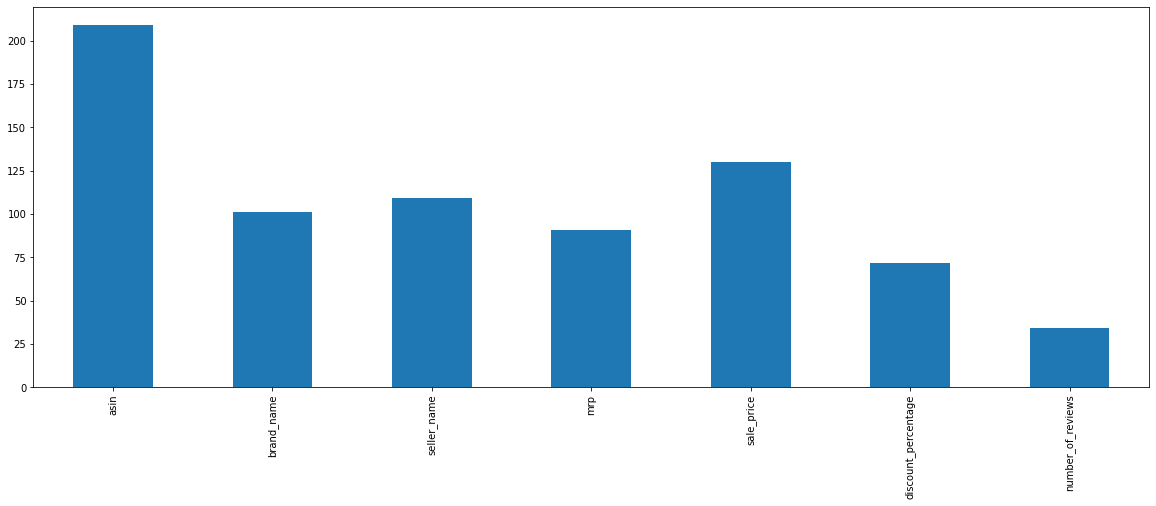

In [20]:
# plot figure 
plt.figure(figsize=(20,7))
# plot unique value count 
data.nunique().plot.bar()
plt.show()

### two class

In [26]:
# make classes - two
data['true_2_cls']=['uv' if value>data.discount_percentage.mean() else 'nuv' for value in data.discount_percentage]

[]

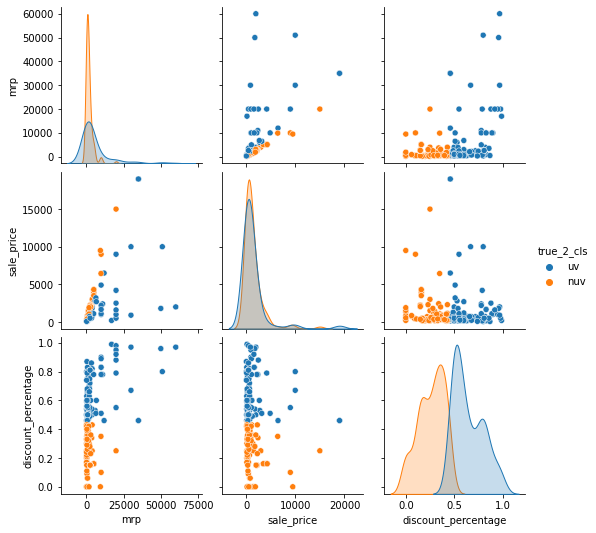

In [27]:
# import 
import seaborn as sns

# plot pair plot 
sns.pairplot(data[['mrp','sale_price','discount_percentage','true_2_cls']],hue='true_2_cls')
plt.plot()

### three class

In [28]:
# make classes - two
data['true_3_cls']=['nuv' if value<data.discount_percentage.mean() else 'huv' if value>data.discount_percentage.mean()*1.5 else 'uv' for value in data.discount_percentage]

[]

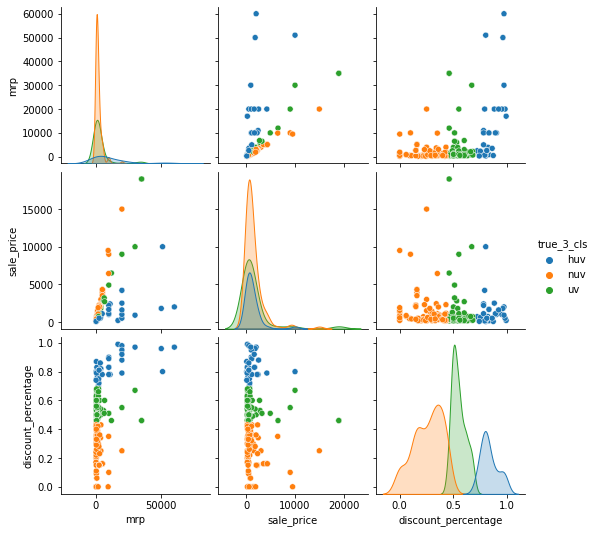

In [29]:
# plot pair plot 
sns.pairplot(data[['mrp','sale_price','discount_percentage','true_3_cls']],hue='true_3_cls')
plt.plot()

#### worse five products 

In [30]:
worse_sorted=data_original.sort_values('discount_percentage',axis=0,ascending=False,inplace=False,
                                       kind='quicksort',na_position='last',ignore_index=False,key=None)
data_original.iloc[:5]['product_url'].values  

array(['https://www.amazon.in/BHAGIRATH-Standard-Disposable-Pollution-Surgical/dp/B085GL266P/',
       'https://www.amazon.in/ShopyBucket-Standard-Disposable-Pollution-Protection/dp/B0855V7MQ8/',
       'https://www.amazon.in/Gnexin-Approved-Respirator-Pollution-virus/dp/B084M511KM/',
       'https://www.amazon.in/Aurum-Creations-Disposable-Stretchable-100/dp/B0777HKWJF/',
       'https://www.amazon.in/Smart-Care-Face-Cloth-Green/dp/B079CHH5M3/'],
      dtype=object)

## prediction (sample)

In [31]:
# data 
X=data.loc[:,['discount_percentage']].values

# import function 
from sklearn.preprocessing import normalize
# doc -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

X_norm,norms_of_x=normalize(X,norm='l2',axis=0,copy=True,return_norm=True)

# import module
from sklearn.cluster import KMeans
# source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

clusterer_=KMeans(n_clusters=2,random_state=10,n_init=3,max_iter=3)
clusterer_.fit(X_norm)
print('cluster_centers_:',clusterer_.cluster_centers_)

cluster_centers_: [[0.03211115]
 [0.08384   ]]


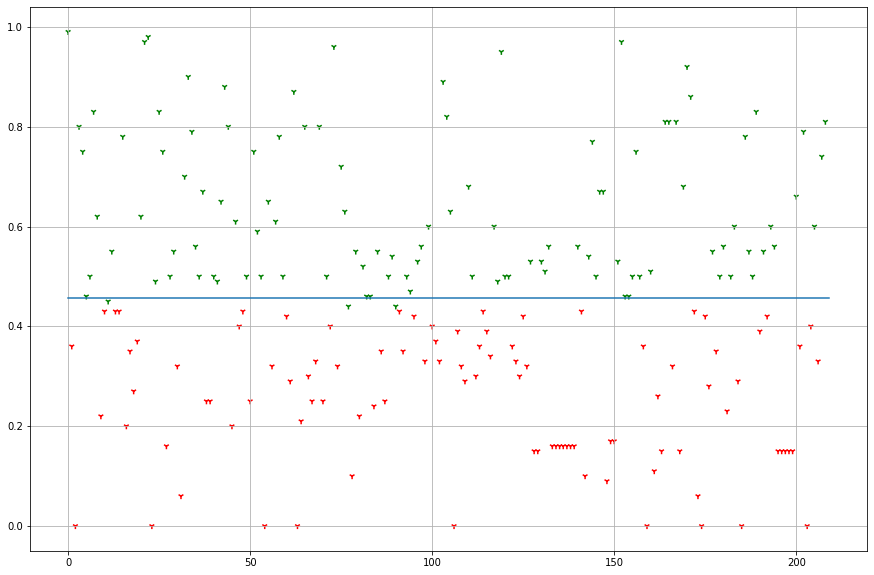

In [32]:
# import Label-Encoder
from sklearn.preprocessing import LabelEncoder

encoder_cls_2_=LabelEncoder()

plt.figure(figsize=(15,10))
#plt.scatter(range(data.discount_percentage.shape[0]),data.discount_percentage,c=encoder_cls_2_.fit_transform(data.true_2_cls.values))
plt.scatter(range(data.discount_percentage.shape[0]),data.discount_percentage,c=['r' if value==0 else 'g' for value in clusterer_.labels_],marker='1')
plt.plot([0,data.discount_percentage.shape[0]],[data.discount_percentage.mean()]*2)
plt.grid()
plt.show()

## feature_selection

In [33]:
data.columns

Index(['asin', 'brand_name', 'seller_name', 'mrp', 'sale_price',
       'discount_percentage', 'number_of_reviews', 'true_2_cls', 'true_3_cls'],
      dtype='object')

In [34]:
# data 
X_fs=data.values[:,1:-3]
# labels 
y_fs=data.true_3_cls.values

# preprocess 

# import Label-Encoder
from sklearn.preprocessing import LabelEncoder

# make encoder 
encoder_cls_3_brand_name=LabelEncoder()
encoder_cls_3_seller_name=LabelEncoder()
encoder_cls_labels=LabelEncoder()
# transform
X_fs[:,0]=encoder_cls_3_brand_name.fit_transform(X_fs[:,0])
X_fs[:,1]=encoder_cls_3_seller_name.fit_transform(X_fs[:,1])
y_fs=encoder_cls_labels.fit_transform(y_fs)

# copy data
X_fs_norm=X_fs.copy()

# normalize - import function 
from sklearn.preprocessing import normalize
# doc -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

X_fs_norm[:,2:4],norms_of_x=normalize(X_fs_norm[:,2:4],norm='l1',axis=0,copy=True,return_norm=True)

X_fs[:2],X_fs_norm[:2],set(y_fs)

(array([[11, 16, 16999.0, 199.0, 0.99],
        [73, 14, 798.0, 510.0, 0.36]], dtype=object),
 array([[11, 16, 0.02065763186420575, 0.0006824534028361254, 0.99],
        [73, 14, 0.0009697505869543027, 0.001749001183147859, 0.36]],
       dtype=object),
 {0, 1, 2})

In [35]:
# source - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
# source - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# source - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import cross_validate,KFold,GridSearchCV
# source - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
from sklearn.feature_selection import RFE


# creating a KFold object with 5 splits 
folds = KFold(n_splits=5,shuffle=True,random_state=100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select':list(range(1,X_fs.shape[1]))}]

# load model 
from sklearn.tree import DecisionTreeClassifier
# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# make model - Test classifier - DecisionTreeRegressor
test_tree_single=DecisionTreeClassifier()
# train 
test_tree_single.fit(X_fs_norm,y_fs)

# set up GridSearchCV()
# score - source: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

model_f_select = GridSearchCV(estimator=RFE(test_tree_single),param_grid=hyper_params,scoring=None, 
                              cv=folds,verbose=1,return_train_score=True) 

# fit the model
model_f_select.fit(X_fs_norm,y_fs) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeClassifier()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4]}],
             return_train_score=True, verbose=1)

In [36]:
# cv results
results_ = pd.DataFrame(model_f_select.cv_results_)
results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005358,0.001006,0.000613,0.000501,1,{'n_features_to_select': 1},1.0,0.97619,1.0,1.0,...,0.995238,0.009524,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.006815,0.000418,0.000397,0.000431,2,{'n_features_to_select': 2},1.0,0.97619,1.0,1.0,...,0.995238,0.009524,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.004980,0.000016,0.001013,0.000020,3,{'n_features_to_select': 3},1.0,0.97619,1.0,1.0,...,0.995238,0.009524,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.003581,0.000483,0.000808,0.000404,4,{'n_features_to_select': 4},1.0,0.97619,1.0,1.0,...,0.995238,0.009524,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


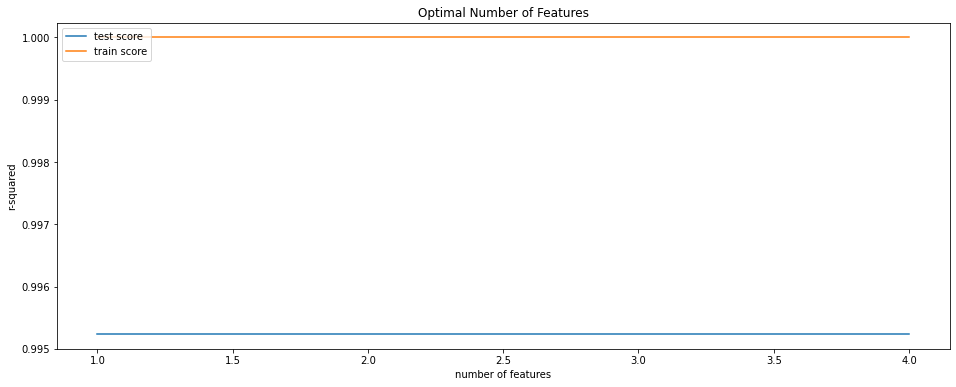

In [37]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(results_["param_n_features_to_select"], results_["mean_test_score"])
plt.plot(results_["param_n_features_to_select"], results_["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

## Classifier comparison 

In [38]:

# call main classifiers - 

#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# names 
names=["Nearest Neighbors","Linear SVM","Decision Tree"]
# make classifiers
classifiers_=[KNeighborsClassifier(n_neighbors=3),SVC(kernel='linear'),
              DecisionTreeClassifier()]

# split
from sklearn.model_selection import train_test_split
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# labels
y_fs_2_cls=data.true_2_cls.values
# fit transform
label_encoder_2_cls=LabelEncoder()
y_fs_2_cls=label_encoder_2_cls.fit_transform(y_fs_2_cls)

# split data - only by 'brand_name', 'seller_name'
X_train,X_test,y_train,y_test=train_test_split(X_fs_norm[:,:2],y_fs_2_cls,test_size=0.30,random_state=8)

# shape 
X_train.shape,X_test.shape,y_train.shape,y_test.shape,set(y_fs_2_cls)

((146, 2), (63, 2), (146,), (63,), {0, 1})

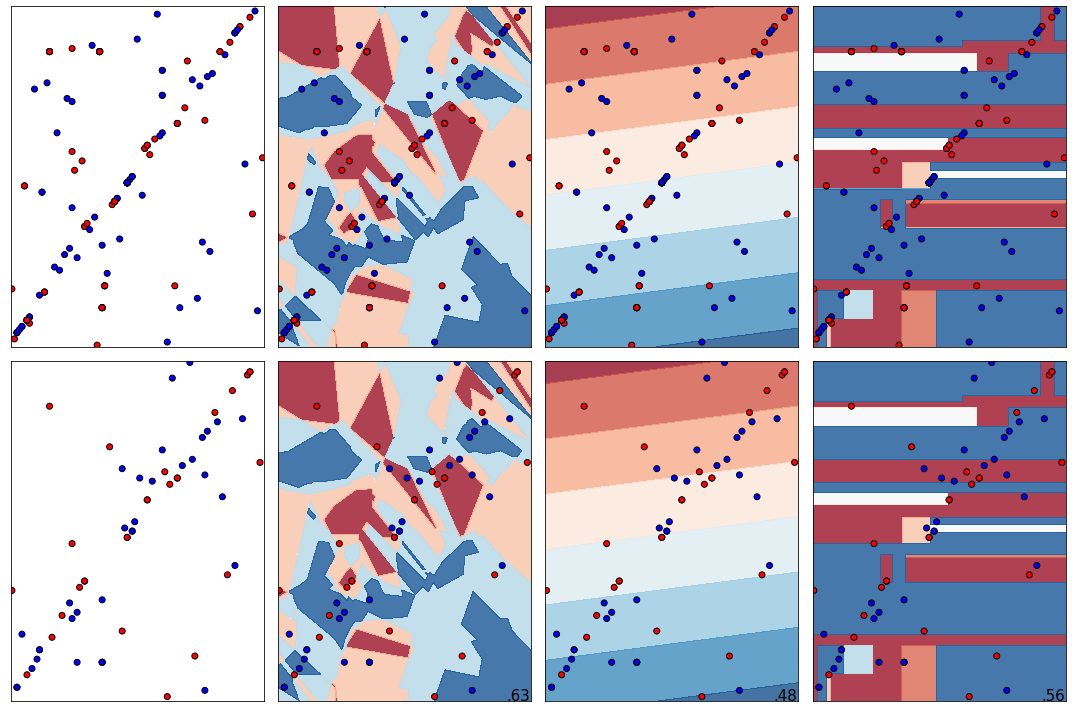

In [39]:
# make mesh 
h = .02  # step size in the mesh
x_min, x_max = X_fs_norm[:, 0].min()-.5,X_fs_norm[:, 0].max()+.5
y_min, y_max = X_fs_norm[:, 1].min()-.5,X_fs_norm[:, 1].max()+.5
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# get color map 
from matplotlib.colors import ListedColormap
#
cmap=ListedColormap(['#FF0000','#0000FF'])
#
cm=plt.cm.RdBu

fig=plt.figure(figsize=(15,10))

# plot train 
ax=fig.add_subplot(2,len(classifiers_)+1,1)
# Plot the training points
ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cmap,edgecolors='k')
ax.set_xlim(xx.min(),xx.max()),ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(()),ax.set_yticks(())

# plot test 
ax=fig.add_subplot(2,len(classifiers_)+1,len(classifiers_)+2)
# Plot the testing points
ax.scatter(X_test[:,0],X_test[:,1],cmap=cmap,c=y_test,edgecolors='k')
ax.set_xlim(xx.min(),xx.max()),ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(()),ax.set_yticks(())

# iterate over dataset - traning
for plt_number,name_n_clf in enumerate(zip(names,classifiers_),2):

  ax=fig.add_subplot(2,len(classifiers_)+1,plt_number)

  # train /fit data
  name_n_clf[1].fit(X_train,y_train)
  score=name_n_clf[1].score(X_test,y_test)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  if hasattr(name_n_clf[1], "decision_function"): 
    Z=name_n_clf[1].decision_function(np.c_[xx.ravel(),yy.ravel()])
  else:
    Z=name_n_clf[1].predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]

  # Put the result into a color plot
  Z=Z.reshape(xx.shape)
  ax.contourf(xx,yy,Z,cmap=cm,alpha=.8)

  # Plot the training points
  ax.scatter(X_train[:, 0],X_train[:, 1],c=y_train,cmap=cmap,edgecolors='k')
  #
  ax.set_xlim(xx.min(),xx.max()),ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(()),ax.set_yticks(())

  # Plot test points 
  ax=fig.add_subplot(2,len(classifiers_)+1,4+plt_number)
  ax.contourf(xx,yy,Z,cmap=cm,alpha=.8)
  # plot points - test
  ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cmap,edgecolors='k')
  #
  ax.set_xlim(xx.min(),xx.max()),ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(()),ax.set_yticks(())
  ax.text(xx.max()-.3,yy.min()+.3,('%.2f'%score).lstrip('0'),size=15,horizontalalignment='right')

plt.tight_layout()
plt.show()